 # <center>  LAB4 - Efekt Rungego </center>
# <center>  Gosztyła Mikołaj, Smółka Antoni </center> 



## Zadanie 1. Wyznacz wielomiany interpolujące funkcje

- $ f1(x) = \frac{1}{1 + 25x^2} $ na przedziale [−1, 1]
- $ f2(x) = \exp(\cos(x)) $ na przedziale [0, 2π]

używając:

- wielomianów Lagrange’a z równoodległymi węzłami $ xj = x0 + jh $gdzie $ j = 0, 1, ..., n $ i $ h = (xn − x0)/n $
- kubicznych funkcji sklejanych z równoodległymi węzłami $xj = x0 + jh $ gdzie $ j = 0, 1, ..., n$  i $ h = (xn − x0)/n $
- wielomianów Lagrange’a z węzłami Czebyszewa

$ x_j = \cos(\theta_j) gdzie \theta_j = \frac{\pi(2j + 1)}{2(n + 1)} i 0 \leq j \leq n. $


#### (a) 
Dla funkcji Rungego **f1(x)** z **n = 12** węzłami interpolacji przedstaw na wspólnym wykresie funkcję **f1(x)** oraz wyznaczone wielomiany interpolacyjne i funkcję sklejaną. W celu stworzenia wykresu wykonaj próbkowanie funkcji **f1(x)** i wielomianów interpolacyjnych na 10 razy gęstszym zbiorze (próbkowanie jednostajne w **x** dla węzłów równoodległych, jednostajne w **θ** dla węzłów Czebyszewa). Pamiętaj o podpisaniu wykresu i osi oraz o legendzie.

#### (b)
Wykonaj interpolację funkcji **f1(x)** i **f2(x)** z **n = 4, 5, ..., 50** węzłami interpolacji używając każdej z powyższych trzech metod interpolacji. Ewaluację funkcji wielomianów interpolacyjnych oraz funkcji sklejanych przeprowadź na zbiorze 500 losowo wybranych punktów z dziedziny funkcji. Stwórz dwa rysunki: jeden dla **f1(x)**, drugi dla **f2(x)**. Na każdym rysunku przedstaw razem wykresy normy wektora błędów (czyli długości wektora) na tym zbiorze punktów w zależności od liczby węzłów interpolacji **n** dla każdej z trzech metod interpolacji.

**Która metoda interpolacji jest najbardziej dokładna a która najmniej?**

---

**Uwaga 1.** Transformacja węzłów Czebyszewa **r ∈ [−1, 1]** na punkty **x ∈ [a, b]** dana jest wzorem $ x = a + (b − a) * (r + 1)/2 $.

**Uwaga 2.** Interpolację funkcjami sklejanymi można zaimplementować funkcją `scipy.interpolate.interp1d`. Zaimplementuj własnoręcznie interpolację Lagrange’a. Interpolacja Lagrange’a w tym implementacja biblioteczna `scipy.interpolate.lagrange` jest niestabilna numerycznie.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from numpy.polynomial.chebyshev import chebpts2
from scipy.interpolate import CubicSpline
import numpy.random as npr

In [2]:
def f1(x):
    return 1 / (1 + 25 * x**2)

def f2(x):
    return np.exp(np.cos(x))

def lagrange_interpolation(f, x, x_interp):
    n = len(x)
    P = np.zeros_like(x_interp)
    for j in range(n):
        L = np.ones_like(x_interp)
        for i in range(n):
            if i != j:
                L *= (x_interp - x[i]) / (x[j] - x[i])
        P += f(x[j]) * L
    return P
    
def chebyshev_nodes(n, a, b):
    j = np.arange(n + 1)
    nodes = np.cos((2*j + 1) * np.pi / (2 * (n + 1)))
    return a + 0.5 * (b - a) * (1 + nodes)

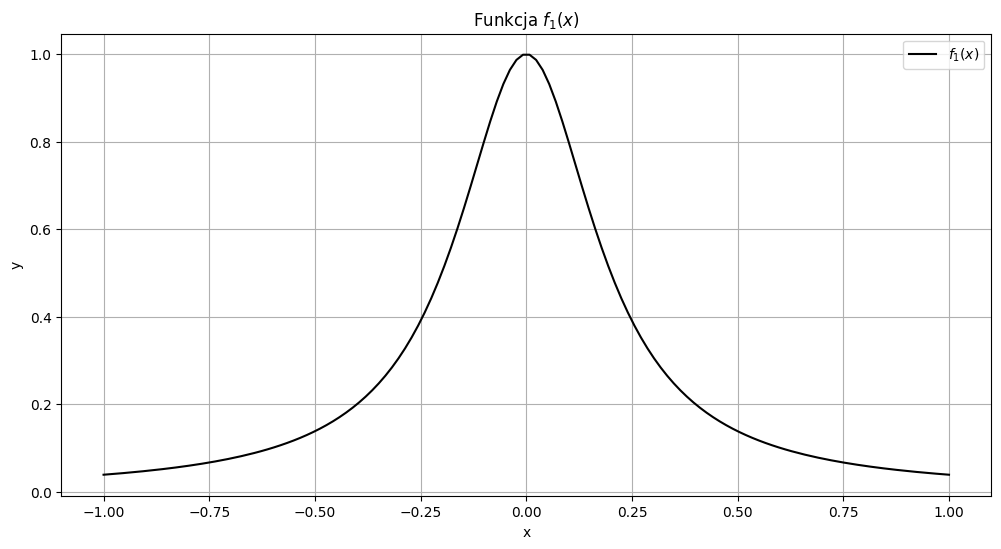

In [3]:
n = 12
x_uniform = np.linspace(-1, 1, n + 1)
x_dense_uniform = np.linspace(-1, 1, 10*(n + 1))

plt.figure(figsize=(12, 6))
plt.plot(x_dense_uniform, f1(x_dense_uniform), 'k', label='$f_1(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Funkcja $f_1(x)$')
plt.legend()
plt.grid(True)
plt.show()

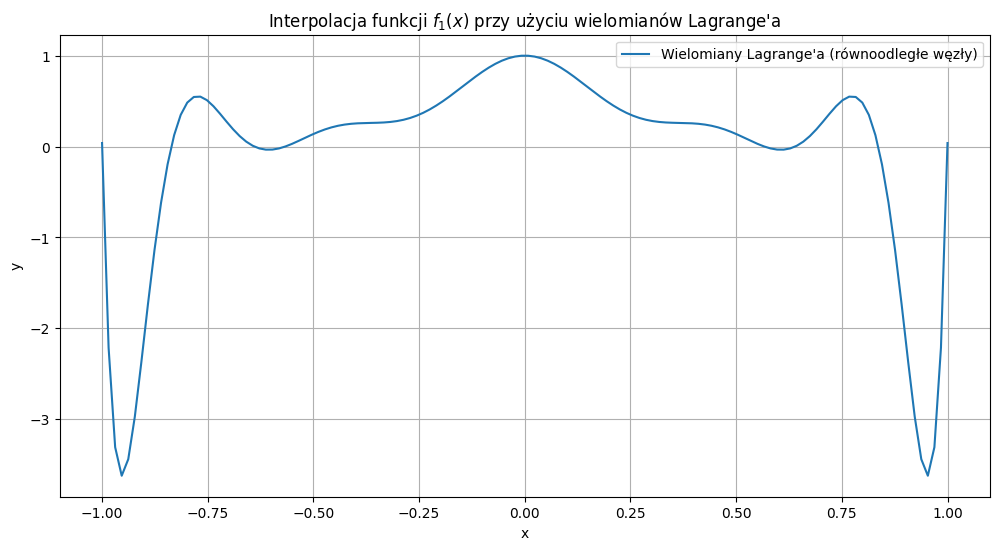

In [4]:
P_uniform = lagrange_interpolation(f1, x_uniform, x_dense_uniform)

plt.figure(figsize=(12, 6))
plt.plot(x_dense_uniform, P_uniform, label='Wielomiany Lagrange\'a (równoodległe węzły)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolacja funkcji $f_1(x)$ przy użyciu wielomianów Lagrange\'a')
plt.legend()
plt.grid(True)
plt.show()

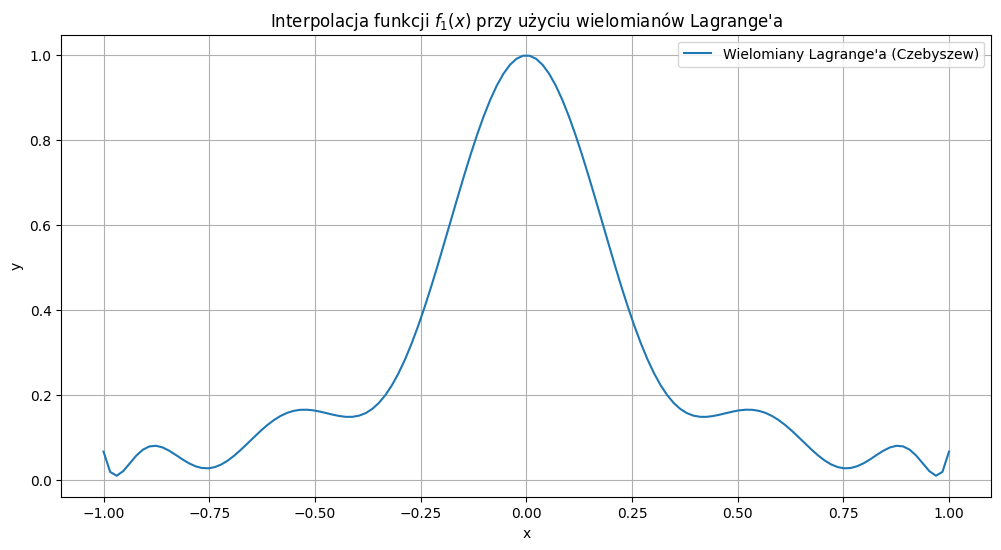

In [5]:
x_chebyshev = chebyshev_nodes(n, -1, 1)
x_dense_chebyshev = np.linspace(-1, 1, 10*(n + 1))
P_chebyshev = lagrange_interpolation(f1, x_chebyshev, x_dense_chebyshev)

plt.figure(figsize=(12, 6))
plt.plot(x_dense_chebyshev, P_chebyshev, label='Wielomiany Lagrange\'a (Czebyszew)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolacja funkcji $f_1(x)$ przy użyciu wielomianów Lagrange\'a')
plt.legend()
plt.grid(True)
plt.show()

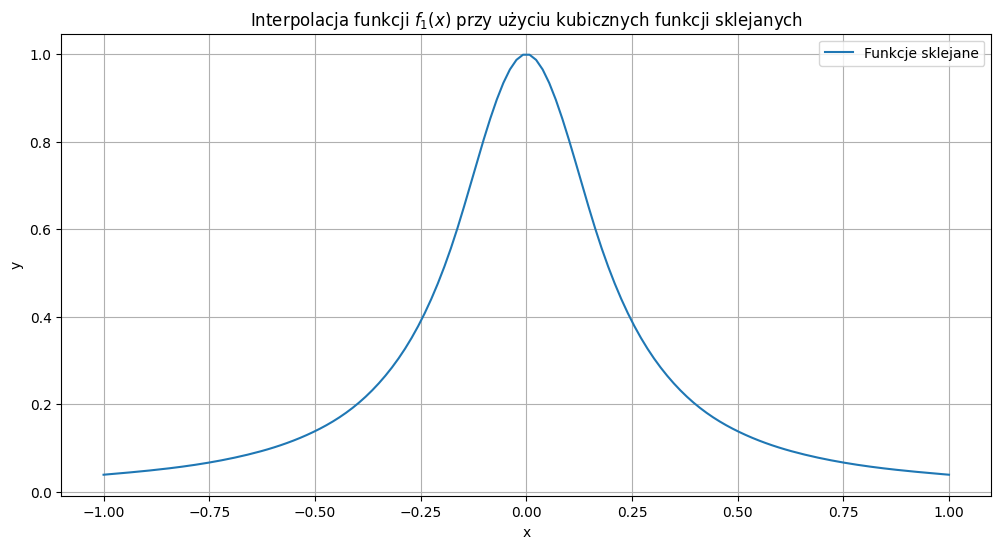

In [6]:
x = np.linspace(-1, 1, n + 1)
y = f1(x)
cs = interp1d(x, y, kind='cubic')
P_cubic = cs(x_dense_uniform)

plt.figure(figsize=(12, 6))
plt.plot(x_dense_uniform, P_cubic, label='Funkcje sklejane')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolacja funkcji $f_1(x)$ przy użyciu kubicznych funkcji sklejanych')
plt.legend()
plt.grid(True)
plt.show()

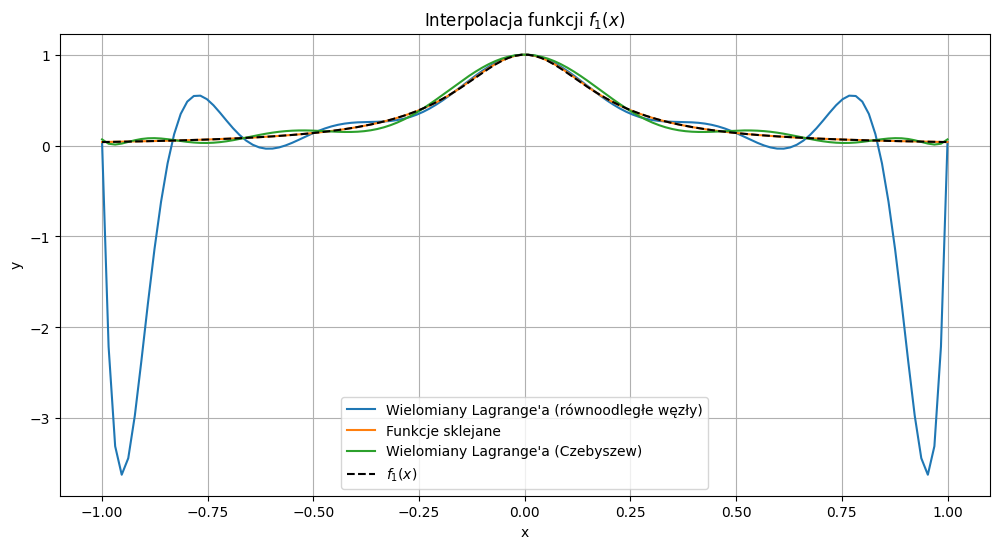

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(x_dense_uniform, P_uniform, label='Wielomiany Lagrange\'a (równoodległe węzły)')
plt.plot(x_dense_uniform, P_cubic, label='Funkcje sklejane')
plt.plot(x_dense_chebyshev, P_chebyshev, label='Wielomiany Lagrange\'a (Czebyszew)')
plt.plot(x_dense_uniform, f1(x_dense_uniform), 'k--', label='$f_1(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolacja funkcji $f_1(x)$')
plt.legend()
plt.grid(True)
plt.show()

# b.)

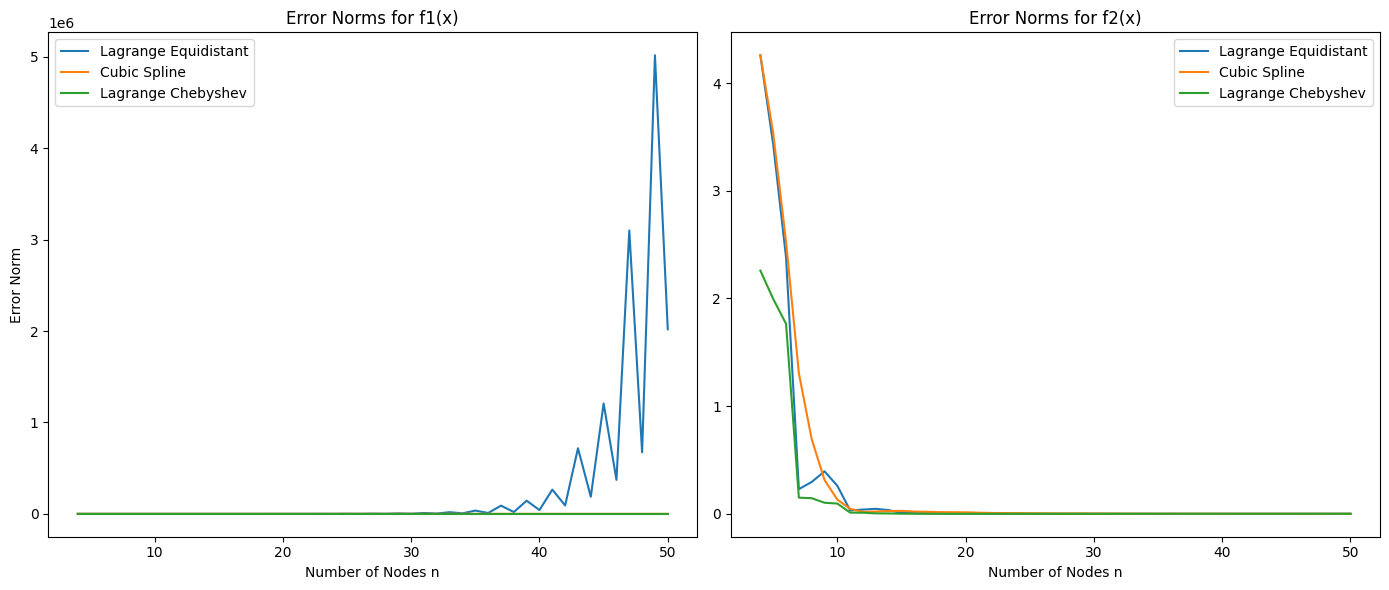

In [8]:

n_values = range(4, 51)
errors_f1 = np.zeros((len(n_values), 3))
errors_f2 = np.zeros((len(n_values), 3))

for idx, n in enumerate(n_values):
    x_equidistant = np.linspace(-1, 1, n)
    x_chebyshev = chebyshev_nodes(n-1, -1, 1)  
    x_random = np.sort(np.random.uniform(-1, 1, 500))
    
    y_lagrange_eq = lagrange_interpolation(f1, x_equidistant, x_random)
    y_cubic_spline_eq = interp1d(x_equidistant, f1(x_equidistant), kind='cubic')(x_random)
    y_lagrange_cheb = lagrange_interpolation(f1, x_chebyshev, x_random)
    
    errors_f1[idx] = [np.linalg.norm(f1(x_random) - y_lagrange_eq),
                      np.linalg.norm(f1(x_random) - y_cubic_spline_eq),
                      np.linalg.norm(f1(x_random) - y_lagrange_cheb)]
    
    x_equidistant_f2 = np.linspace(0, 2*np.pi, n)
    x_chebyshev_f2 = chebyshev_nodes(n-1, 0, 2*np.pi)
    x_random_f2 = np.sort(np.random.uniform(0, 2*np.pi, 500))
    
    y_lagrange_eq_f2 = lagrange_interpolation(f2, x_equidistant_f2, x_random_f2)
    y_cubic_spline_eq_f2 = interp1d(x_equidistant_f2, f2(x_equidistant_f2), kind='cubic')(x_random_f2)
    y_lagrange_cheb_f2 = lagrange_interpolation(f2, x_chebyshev_f2, x_random_f2)
    
    errors_f2[idx] = [np.linalg.norm(f2(x_random_f2) - y_lagrange_eq_f2),
                      np.linalg.norm(f2(x_random_f2) - y_cubic_spline_eq_f2),
                      np.linalg.norm(f2(x_random_f2) - y_lagrange_cheb_f2)]


plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(list(n_values), errors_f1[:, 0], label='Lagrange Equidistant')
plt.plot(list(n_values), errors_f1[:, 1], label='Cubic Spline')
plt.plot(list(n_values), errors_f1[:, 2], label='Lagrange Chebyshev')
plt.title('Error Norms for f1(x)')
plt.xlabel('Number of Nodes n')
plt.ylabel('Error Norm')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(list(n_values), errors_f2[:, 0], label='Lagrange Equidistant')
plt.plot(list(n_values), errors_f2[:, 1], label='Cubic Spline')
plt.plot(list(n_values), errors_f2[:, 2], label='Lagrange Chebyshev')
plt.title('Error Norms for f2(x)')
plt.xlabel('Number of Nodes n')
plt.legend()

plt.tight_layout()
plt.show()


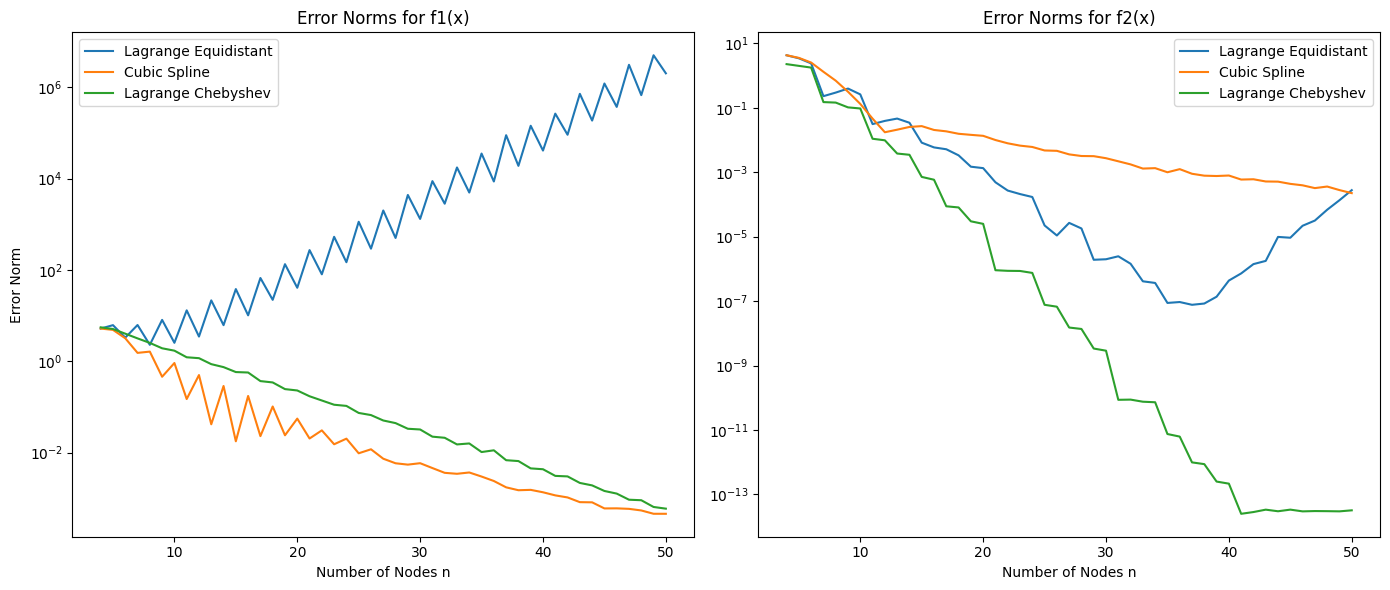

In [9]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(list(n_values), errors_f1[:, 0], label='Lagrange Equidistant')
plt.plot(list(n_values), errors_f1[:, 1], label='Cubic Spline')
plt.plot(list(n_values), errors_f1[:, 2], label='Lagrange Chebyshev')
plt.title('Error Norms for f1(x)')
plt.xlabel('Number of Nodes n')
plt.ylabel('Error Norm')
plt.yscale('log')  

plt.legend()

plt.subplot(1, 2, 2)
plt.plot(list(n_values), errors_f2[:, 0], label='Lagrange Equidistant')
plt.plot(list(n_values), errors_f2[:, 1], label='Cubic Spline')
plt.plot(list(n_values), errors_f2[:, 2], label='Lagrange Chebyshev')
plt.title('Error Norms for f2(x)')
plt.xlabel('Number of Nodes n')
plt.yscale('log')  

plt.legend()

plt.tight_layout()
plt.show()


Wykresy norm błędów zarówno dla **f1(x) = 1 / (1 + 25x^2)**, jak i dla **f2(x) = exp(cos(x))** w funkcji liczby węzłów interpolacji (n) ujawniają kilka interesujących wzorców, które odnoszą się do natury interpolowanych funkcji oraz charakterystyk używanych metod interpolacji. Oto wyjaśnienie, dlaczego wykresy mogą wyglądać w ten sposób:

### Dla **f1(x)**:
1. **Zjawisko Rungego**: Funkcja **f1(x)** jest klasycznym przykładem, gdzie równoodległe węzły prowadzą do zjawiska Rungego. Jest to problem oscylacji na krawędziach przedziału, który pojawia się przy użyciu wielomianów wysokiego stopnia i równoodległych węzłów interpolacji. W związku z tym, gdy **n** rośnie, błąd może nie maleć, jak można by oczekiwać. Wyjaśnia to, dlaczego interpolacja Lagrange'a z równoodległymi węzłami nie zawsze działa dobrze, szczególnie dla wyższych wartości **n**.

2. **Splajny Kubiczne**: Błąd związany z interpolacją splajnami kubicznymi pozostaje stosunkowo niski i stabilny dla różnych wartości **n**. Ta stabilność wynika z tego, że splajny kubiczne są wielomianami kawałkowymi, które unikają problemu oscylacji wielomianów wysokiego stopnia. Są one szczególnie dobrze przystosowane do funkcji o gładkich zmianach, takich jak **f1(x)**.

3. **Węzły Czebyszewa**: Użycie węzłów Czebyszewa do interpolacji pomaga złagodzić zjawisko Rungego, ponieważ te węzły są gęściej rozmieszczone na końcach przedziału interpolacji. Taki rozkład redukuje oscylacje i sprawia, że interpolacja Lagrange'a z węzłami Czebyszewa jest bardziej dokładna niż z równoodległymi węzłami, szczególnie gdy **n** rośnie.

### Dla **f2(x)**:

1. **Okresowość**: Okresowy charakter **f2(x)** oznacza, że błędy mogą być bardziej równomiernie rozłożone na całym przedziale interpolacji, szczególnie dla metod, które mogą naturalnie dostosować się do gładkości funkcji i jej zachowania okresowego, takich jak splajny kubiczne.



